In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_parquet('../../data/model_data/model_data_single_output.parquet')

df_mod = df_mod.loc[df_mod['Position'] == 'QB', :].reset_index(drop=True)

df_mod

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score
0,2020,1,patrick mahomes,QB,KC,20.4,1.0,1,306.500000,2.460615,NaN,20.488656,NaN,NaN,0.250000,1.0,31.50,22.00
1,2020,1,lamar jackson,QB,BAL,27.5,2.0,2,222.500000,1.528860,NaN,60.500000,NaN,NaN,0.476190,1.0,27.25,20.25
2,2020,1,dak prescott,QB,DAL,17.6,4.0,3,285.500000,2.495487,NaN,11.517041,NaN,NaN,0.230947,-1.0,25.50,26.50
3,2020,1,russell wilson,QB,SEA,31.8,5.0,4,259.500000,1.564394,NaN,21.500000,NaN,NaN,0.200000,-1.0,NaN,NaN
4,2020,1,deshaun watson,QB,HOU,20.8,6.0,5,275.500000,1.574315,NaN,30.512870,NaN,NaN,0.344828,-1.0,22.00,31.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2023,17,taylor heinicke,QB,ATL,15.1,52.0,28,203.494463,1.304627,0.510823,10.504409,NaN,NaN,0.153846,-1.0,18.25,20.75
2001,2023,17,cj beathard,QB,JAX,9.5,54.0,29,214.495591,1.351543,0.567442,10.500000,NaN,NaN,0.133333,1.0,20.75,17.25
2002,2023,17,sam howell,QB,WAS,6.7,59.0,30,234.500000,1.394584,0.639448,12.501128,NaN,NaN,0.153846,1.0,17.25,31.25
2003,2023,17,bailey zappe,QB,NE,12.1,71.0,31,195.500000,0.615610,0.616228,5.489177,NaN,NaN,0.058824,-1.0,12.75,27.25


In [2]:
X = df_mod[[
    'Rank',
    'Position Rank',
    'Location',
    'Team Projected Score',
    'Opponent Projected Score',
    'Adjusted Passing Yards Projection',
    'Adjusted Passing Touchdowns Projection',
    'Adjusted Interceptions Projection',
    'Adjusted Rushing Yards Projection',
    'Anytime Touchdown Probability',
]].copy()

X

,Rank,Position Rank,Location,Team Projected Score,Opponent Projected Score,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Anytime Touchdown Probability
0,1.0,1,1.0,31.50,22.00,306.500000,2.460615,NaN,20.488656,0.250000
1,2.0,2,1.0,27.25,20.25,222.500000,1.528860,NaN,60.500000,0.476190
2,4.0,3,-1.0,25.50,26.50,285.500000,2.495487,NaN,11.517041,0.230947
3,5.0,4,-1.0,NaN,NaN,259.500000,1.564394,NaN,21.500000,0.200000
4,6.0,5,-1.0,22.00,31.50,275.500000,1.574315,NaN,30.512870,0.344828
...,...,...,...,...,...,...,...,...,...,...
2000,52.0,28,-1.0,18.25,20.75,203.494463,1.304627,0.510823,10.504409,0.153846
2001,54.0,29,1.0,20.75,17.25,214.495591,1.351543,0.567442,10.500000,0.133333
2002,59.0,30,1.0,17.25,31.25,234.500000,1.394584,0.639448,12.501128,0.153846
2003,71.0,31,-1.0,12.75,27.25,195.500000,0.615610,0.616228,5.489177,0.058824


In [3]:
y = df_mod['Fantasy Points'].copy()

y

0       20.4
1       27.5
2       17.6
3       31.8
4       20.8
        ... 
2000    15.1
2001     9.5
2002     6.7
2003    12.1
2004    13.7
Name: Fantasy Points, Length: 2005, dtype: float64

In [4]:
groups = df_mod['Season'].astype(str) + ' Week ' + df_mod['Week'].astype(str)

groups

0        2020 Week 1
1        2020 Week 1
2        2020 Week 1
3        2020 Week 1
4        2020 Week 1
            ...     
2000    2023 Week 17
2001    2023 Week 17
2002    2023 Week 17
2003    2023 Week 17
2004    2023 Week 17
Length: 2005, dtype: object

In [5]:
df_folds = pd.read_parquet('../../data/model_data/folds.parquet')

df_folds

,Fold ID,Season Week
0,0,2022 Week 3
1,0,2021 Week 7
2,0,2021 Week 1
3,0,2023 Week 16
4,0,2021 Week 11
...,...,...
62,2,2020 Week 15
63,2,2023 Week 14
64,2,2021 Week 5
65,2,2022 Week 6


In [6]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.mode.chained_assignment = None

# splitter = GroupKFold(n_splits=3)

cv_data = []
# for is_indexes, oos_indexes in splitter.split(X=X, y=y, groups=groups):
for fold in df_folds['Fold ID'].unique():
    oos_season_week = df_folds.loc[df_folds['Fold ID'] == fold, 'Season Week']
    is_indexes = df_mod.loc[~groups.isin(oos_season_week), :].index
    oos_indexes = df_mod.loc[groups.isin(oos_season_week), :].index
    # split
    X_is = X.iloc[is_indexes]
    X_oos = X.iloc[oos_indexes]

    y_is = y.iloc[is_indexes]
    y_oos = y.iloc[oos_indexes]

    groups_is = groups.iloc[is_indexes]
    df_mod_oos = df_mod.iloc[oos_indexes]

    gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=22)
    for train_indexes, val_indexes in gss.split(X=X_is, y=y_is, groups=groups_is):
            X_train = X_is.iloc[train_indexes]
            X_val = X_is.iloc[val_indexes]

            y_train = y_is.iloc[train_indexes]
            y_val = y_is.iloc[val_indexes]

    # impute
    scaler = StandardScaler()
    imputer = IterativeImputer(initial_strategy='median', max_iter=100)

    X_train_fill_na = imputer.fit_transform(scaler.fit_transform(X_train))
    X_train[X_train.columns] = scaler.inverse_transform(X_train_fill_na).copy()
    X_train['Prop Bets Projection'] = (
        X_train['Adjusted Passing Yards Projection']*0.04 + 
        X_train['Adjusted Passing Touchdowns Projection']*4 + 
        X_train['Adjusted Interceptions Projection']*(-2) + 
        X_train['Adjusted Rushing Yards Projection']*0.1 +
        X_train['Anytime Touchdown Probability']*6
    )

    X_val_fill_na = imputer.transform(scaler.transform(X_val))
    X_val[X_val.columns] = scaler.inverse_transform(X_val_fill_na).copy()
    X_val['Prop Bets Projection'] = (
        X_val['Adjusted Passing Yards Projection']*0.04 + 
        X_val['Adjusted Passing Touchdowns Projection']*4 + 
        X_val['Adjusted Interceptions Projection']*(-2) + 
        X_val['Adjusted Rushing Yards Projection']*0.1 +
        X_val['Anytime Touchdown Probability']*6
    )

    X_oos_fill_na = imputer.transform(scaler.transform(X_oos))
    X_oos[X_oos.columns] = scaler.inverse_transform(X_oos_fill_na).copy()
    X_oos['Prop Bets Projection'] = (
        X_oos['Adjusted Passing Yards Projection']*0.04 + 
        X_oos['Adjusted Passing Touchdowns Projection']*4 + 
        X_oos['Adjusted Interceptions Projection']*(-2) + 
        X_oos['Adjusted Rushing Yards Projection']*0.1 +
        X_oos['Anytime Touchdown Probability']*6
    )

    X_train.drop(columns=['Adjusted Passing Yards Projection', 'Adjusted Passing Touchdowns Projection', 'Adjusted Interceptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_val.drop(columns=['Adjusted Passing Yards Projection', 'Adjusted Passing Touchdowns Projection', 'Adjusted Interceptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_oos.drop(columns=['Adjusted Passing Yards Projection', 'Adjusted Passing Touchdowns Projection', 'Adjusted Interceptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)

    cv_data.append((X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos))

for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    print(X_train.shape, X_val.shape, X_oos.shape, y_train.shape, y_val.shape, y_oos.shape, df_mod_oos.shape)

(1102, 6) (215, 6) (688, 6) (1102,) (215,) (688,) (688, 18)
(1150, 6) (211, 6) (644, 6) (1150,) (211,) (644,) (644, 18)
(1129, 6) (203, 6) (673, 6) (1129,) (203,) (673,) (673, 18)


In [7]:
monotonic_contraints_dict = {
    'Rank': -1,
    'Position Rank': -1,
    'Location': 1,
    'Team Projected Score': 1,
    'Adjusted Passing Yards Projection': 1,
    'Adjusted Passing Touchdowns Projection': 1,
    'Adjusted Interceptions Projection': -1,
    'Adjusted Rushing Yards Projection': 1,
    'Anytime Touchdown Probability': 1,
    'Prop Bets Projection': 1,
}

monotone_contraints = [monotonic_contraints_dict.get(c, 0) for c in X_train.columns]

monotone_contraints

[-1, -1, 1, 1, 0, 1]

In [8]:
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import optuna
import numpy as np

def objective(trial, cv_data=cv_data):
    # model tuning
    # params = {
    #     'random_state': 22,
    #     'objective': 'binary:logistic',
    #     'eval_metric': 'logloss',
    #     'n_estimators': 1_000,
    #     'eta': trial.suggest_float('eta', 0.005, 0.100),
    #     'max_depth': trial.suggest_int('max_depth', 4, 16),
    #     'lambda': trial.suggest_float('lambda', 1e-8, 5.0),
    #     'alpha': trial.suggest_float('alpha', 1e-8, 5.0),
    #     'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 5.0),
    #     # 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.30),
    # }
    params = {
        'random_state': 22,
        'metric': 'mean_squared_error',
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        'monotone_constraints': monotone_contraints,
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**8),
        'feature_fraction': trial.suggest_float('feature_fraction', 1e-8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    mod = LGBMRegressor(**params)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_val, X_test, y_train, y_val, y_test, df_mod_oos in cv_data:
        y_actuals.append(y_test)

        mod.fit(
            X_train, 
            y_train, 
            eval_set=(X_val, y_val),
        )

        y_preds.append(mod.predict(X_test))

    return mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds), squared=False)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=50, multivariate=True))
study.optimize(objective, n_trials=500, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean\lib\site-packages\optuna\samplers\_tpe\sampler.py:295: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-10-16 21:20:57,195] A new study created in memory with name: no-name-5529e361-6951-4f09-9d9b-f01c77d08724


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2024-10-16 21:20:57,405] Trial 0 finished with value: 7.3368709582713585 and parameters: {'lambda_l1': 2.084605381503821, 'lambda_l2': 4.816810622816848, 'max_depth': 14, 'num_leaves': 221, 'feature_fraction': 0.17116156190005774, 'min_child_samples': 34}. Best is trial 0 with value: 7.3368709582713585.
[I 2024-10-16 21:20:57,474] Trial 1 finished with value: 7.318708799059343 and parameters: {'lambda_l1': 2.7053283402729833, 'lambda_l2': 6.910413507585547, 'max_depth': 8, 'num_leaves': 209, 'feature_fraction': 0.010526884210839693, 'min_child_samples': 57}. Best is trial 1 with value: 7.318708799059343.
[I 2024-10-16 21:20:57,512] Trial 2 finished with value: 7.356959261164854 and parameters: {'lambda_l1': 8.137261876014703, 'lambda_l2': 7.451002963137353, 'max_depth': 7, 'num_leaves': 3, 'feature_fraction': 0.7720438737240976, 'min_child_samples': 96}. Best is trial 1 with value: 7.318708799059343.
[I 2024-10-16 21:20:57,574] Trial 3 finished with value: 7.302275548182646 and para

{'lambda_l1': 7.524499866447401,
 'lambda_l2': 8.666299198874833,
 'max_depth': 30,
 'num_leaves': 11,
 'feature_fraction': 0.30269086342934237,
 'min_child_samples': 18}

7.269415803092679

In [9]:
params = (
    {
        'random_state': 22,
        'metric': 'mean_squared_error',
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        'monotone_constraints': monotone_contraints,
    } |
    study.best_params
)

testing_data = []
mod = LGBMRegressor(**params)
for X_train, X_val, X_test, y_train, y_val, y_test, df_mod_oos in cv_data:
    mod.fit(
        X_train, 
        y_train, 
        eval_set=(X_val, y_val),
    )
    
    testing_data.append(df_mod_oos.assign(Prediction=mod.predict(X_test)))

df_test = pd.concat(testing_data, ignore_index=True)

df_test

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score,Prediction
0,2020,5,russell wilson,QB,SEA,24.5,1.0,1,307.500000,2.500000,NaN,22.510823,NaN,NaN,0.217391,1.0,30.00,23.50,22.437968
1,2020,5,patrick mahomes,QB,KC,27.7,2.0,2,306.500000,2.442177,0.993078,22.494463,NaN,NaN,0.263158,1.0,32.50,22.00,22.949931
2,2020,5,lamar jackson,QB,BAL,13.5,3.0,3,229.500000,1.548948,1.002480,57.500000,NaN,NaN,0.500000,1.0,30.50,18.50,22.877499
3,2020,5,dak prescott,QB,DAL,12.4,4.0,4,314.500000,2.429358,NaN,17.500000,NaN,NaN,0.312500,1.0,29.75,22.25,22.541680
4,2020,5,josh allen,QB,BUF,16.3,5.0,5,291.500000,1.653524,0.987130,32.474671,NaN,NaN,0.476190,-1.0,27.50,24.50,22.084608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2023,17,taylor heinicke,QB,ATL,15.1,52.0,28,203.494463,1.304627,0.510823,10.504409,NaN,NaN,0.153846,-1.0,18.25,20.75,12.283429
2001,2023,17,cj beathard,QB,JAX,9.5,54.0,29,214.495591,1.351543,0.567442,10.500000,NaN,NaN,0.133333,1.0,20.75,17.25,13.372691
2002,2023,17,sam howell,QB,WAS,6.7,59.0,30,234.500000,1.394584,0.639448,12.501128,NaN,NaN,0.153846,1.0,17.25,31.25,13.475536
2003,2023,17,bailey zappe,QB,NE,12.1,71.0,31,195.500000,0.615610,0.616228,5.489177,NaN,NaN,0.058824,-1.0,12.75,27.25,9.096354


In [10]:
df_test['Prediction'].describe()

count    2005.000000
mean       16.539695
std         3.064875
min         8.592053
25%        14.154880
50%        16.301484
75%        18.539925
max        23.513786
Name: Prediction, dtype: float64

In [11]:
(df_test['Fantasy Points'] - df_test['Prediction']).describe()

count    2005.000000
mean       -0.017400
std         7.271208
min       -20.344196
25%        -5.176572
50%        -0.285047
75%         4.789505
max        23.794313
dtype: float64

In [12]:
(df_test['Fantasy Points'] - df_test['Prediction']).abs().describe()

count    2005.000000
mean        5.805774
std         4.375722
min         0.007768
25%         2.319912
50%         4.968926
75%         8.320548
max        23.794313
dtype: float64

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_test['Fantasy Points'], df_test['Prediction'], squared=False)

7.269415803092679

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Fantasy Points'], df_test['Prediction'])

5.805774441529912

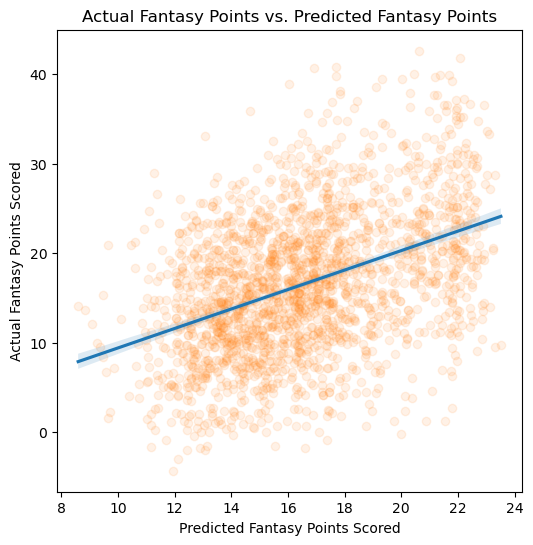

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Fantasy Points',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Fantasy Points vs. Predicted Fantasy Points')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Fantasy Points Scored')

plt.show()

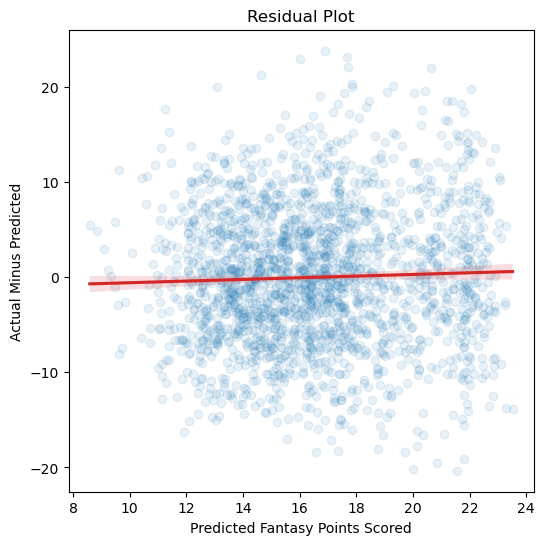

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Fantasy Points'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [17]:
import shap

explainer = shap.Explainer(mod, feature_names=X_train.columns, seed=22)

shap_values = explainer(pd.concat([i[0] for i in cv_data], ignore_index=True))

shap_values.shape

(3381, 6)

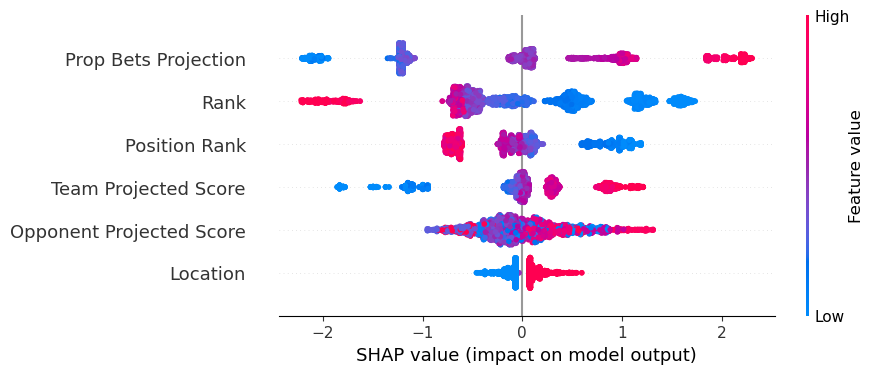

In [18]:
shap.plots.beeswarm(shap_values, max_display=None)